<font color='red'>
# Plotly Visualization Examples
<font color='blue'>
- Ignore the comparison of ridiculous data.
- My only purpose here is practice and come here to look at the syntax quickly when something is forgotten about seaborn.
- Good work

In [1]:
import numpy as np #
import pandas as pd
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objects as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_csv("../input/world-happiness-report-2019.csv") # Import Data
df.rename(index=str, columns={"Country (region)": "Country"}, inplace = True) # To make it easier to write code, we've changed the Country (region) column to Country
df.rename(index=str, columns={"Healthy life\nexpectancy": "Healthy life expectancy"}, inplace = True) # To make it easier to write code, we've changed Healthy life\nexpectancy column to Healthy life expectancy

<font color='red'>
# Line Plot
<font color='blue'>
Visualize countries according to their Freedom and Positive affect

In [3]:
trace1 = go.Scatter(
    x = df.Ladder,
    y = df["Positive affect"],
    mode = "lines",
    name = "Positive Affect",
    marker = dict(color = 'rgb(230, 96, 38)'),
    text = df.Country
)

trace2 = go.Scatter(
    x = df.Ladder,
    y = df.Freedom,
    mode = "lines",
    name = "Freedom",
    marker = dict(color = 'rgb(53, 137, 183)'),
    text = df.Country
)

data = [trace1, trace2]

layout = dict(
    title = "Freedom vs Positive Affect",
    xaxis = dict(title = "Ladder"),
    yaxis = dict(title = "Values")
)

fig = dict(data = data, layout = layout)
iplot(fig)

<font color='red'>
# Scatter Plot
<font color='blue'>
Visualize countries according to their Social support and Healthy life expectancy

In [4]:
trace1 = go.Scatter(
    x = df.Ladder,
    y = df["Social support"],
    mode = "markers",
    name = "Social Support",
    marker = dict(color = "rgb(41, 192, 92)"),
    text = df.Country
)
trace2 = go.Scatter(
    x = df.Ladder,
    y = df["Healthy life expectancy"],
    mode = "markers",
    name = "Healthy Life Expectancy",
    marker = dict(color = "rgb(41, 192, 207)"),
    text = df.Country
)

data = [trace1, trace2]

layout = dict(
    title = go.layout.Title(
        text='Social Support vs Healthy life expectancy',
        font = dict(color = "red", size = 20)),
    xaxis = dict(title = "Ladder"),
    yaxis = dict(title = "Values")
)

fig = dict(data = data, layout = layout)
iplot(fig)

In [5]:
df.head()

,Country,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


<font color='red'>
# Bar Plot
<font color='blue'>
Visualize first 5 countries according to their Negative affect and Corruption

In [6]:
first_5 = df.iloc[:5]

trace1 = go.Bar(
    x = first_5.Country,
    y = first_5["Negative affect"],
    name = "Negative Affect",
    marker = dict(color = 'rgb(247, 136, 136)', line = dict(color = "rgb(0, 0, 0)", width = 1.5)),
    text = "Negative Affect"
)
trace2 = go.Bar(
    x = first_5.Country,
    y = first_5.Corruption,
    name = "Corruption",
    marker = dict(color = "rgb(83, 239, 245)", line = dict(color = "rgb(0, 0, 0)", width = 1.5)),
    text = "Corruption"
)

data = [trace1,trace2]

layout = go.Layout(
    barmode = "group",
    title = go.layout.Title(
        text = "Negative Affect vs Corruption",
        font = dict(color = "red", size = 20)
    )
)

fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [7]:
first_5 = df.iloc[:5]
# Negative affect and Corruption
trace1 = {
    'x' : first_5.Country,
    'y' : first_5["Negative affect"],
    'name' : "Negative Affect",
    'marker' : dict(color = 'rgba(255, 255, 128, 0.5)', line = dict(color = "rgb(0, 0, 0)", width = 1.5)),
    'text' : "Negative Affect",
    'type' : 'bar'
}
trace2 = {
    'x' : first_5.Country,
    'y' : first_5.Corruption,
    'name' : "Corruption",
    'marker' : dict(color = "rgba(255, 174, 255, 0.5)", line = dict(color = "rgb(0, 0, 0)", width = 1.5)),
    'text' : "Corruption",
    'type' : 'bar'
}
data = [trace1, trace2]

layout = {
    'title' : go.layout.Title(
    text = "Negative Affect vs Corruption",
    font = dict(color = "red", size = 20)
    ),
    'barmode' : 'relative'
}

fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [8]:
df.head()

,Country,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


<font color='red'>
# Pie Charts
<font color='blue'>
Visualize first 5 countries according to their Social support

In [9]:
first_5 = df.iloc[:5]
values = first_5["Social support"]
labels = first_5.Country

In [10]:
fig = {
    'data' : [
        {
            'values' : values,
            'labels' : labels,
            "domain": {"x": [0, .5]},
            'name' : "Social Support",
            'hoverinfo' : 'label+percent+name',
            'hole' : .3,
            'type' : 'pie'
        },],
    'layout' : {
        "annotations": [
            { "font": { "size": 20, 'color':'red'},
              "showarrow": False,
              "text": "Social Supports",
                "x": 0.19,
                "y": 1.15
            },
        ]
    }
}

iplot(fig)

<font color='red'>
# Buble Charts
<font color='blue'>
Visualize 25 countries according to their Social support, Positive affect and Healthy life expectancy

In [11]:
df = df[np.isfinite(df['Healthy life expectancy'])]
df = df[np.isfinite(df['Social support'])]

first_25 = df.iloc[:25]
social_support_size = [each for each in first_25["Social support"]]
healthy_color = [each for each in first_25["Healthy life expectancy"]]

data = [
    {
        'x' : first_25.Ladder,
        'y' : first_25["Positive affect"],
        'mode' : 'markers',
        'marker' : {
            'color' : healthy_color,
            'size' : social_support_size,
            'showscale': True
        },
        'text' : df.Country
    }
]
iplot(data)

In [12]:
df.head()

,Country,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


<font color='red'>
# Histogram
<font color='blue'>
Visualize first 50 countries according to their Freedom and Generosity

In [13]:
first_50 = df

trace1 = go.Histogram(
    x = first_50["Freedom"],
    opacity = 0.5,
    name = "Freedom",
    marker = dict(color = 'rgba(12, 50, 196, 0.6)')
)
trace2 = go.Histogram(
    x = first_50["Generosity"],
    opacity = 0.5,
    name = "Generosity",
    marker = dict(color='rgba(171, 50, 96, 0.6)')
)
data = [trace1, trace2]

layout = dict(
    title = go.layout.Title(
        text = "Negative Affect vs Corruption",
        font = dict(size = 20,color = "red")
    )
)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

<font color='red'>
# Box Plots
<font color='blue'>
Visualize countries according to their Social support and Healthy life expectancy

In [14]:
trace1 = go.Box(
    y = df["Social support"],
    name = "Soccial Support",
    marker = dict(color = "rgb(56, 112, 255)")
)
trace2 = go.Box(
    y = df["Healthy life expectancy"],
    name = "Healthy Life Expectancy",
    marker = dict(color = "rgb(170, 56, 252)")
)

layout = dict(
    title = go.layout.Title(
        text = "Soccial Support vs. Healthy Life Expectancy",
        font = dict(color = "red",size = 20)
    )
)

data = [trace1,trace2]
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [15]:
df.head()

,Country,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


<font color='red'>
# Scatter Matrix Plots
<font color='blue'>
Visualize 25 countries according to their Social support, Positive affect and Healthy life expectancy

In [16]:
import plotly.figure_factory as ff
dataframe = df.loc[:,["Social support","Positive affect","Healthy life expectancy"]]
dataframe["index"] = np.arange(1,len(dataframe)+1)
fig = ff.create_scatterplotmatrix(dataframe,diag = "box", index = 'index',colormap = "Bluered",colormap_type = "cat",height = 700, width = 700)
iplot(fig)

/opt/conda/lib/python3.6/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [17]:
df.head()

,Country,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


<font color='red'>
# Inset Plots
<font color='blue'>
Visualize countries according to their Freedom and Positive affect

In [18]:
trace1 = go.Scatter(
    x = df.Ladder,
    y = df.Freedom,
    name = "Freedom",
    marker = dict(color = "rgb(232, 46, 127)")
)
trace2 = go.Scatter(
    x = df.Ladder,
    y = df["Positive affect"],
    name = "Positive Affect",
    marker = dict(color = "rgb(36, 139, 242)"),
    xaxis = "x2",
    yaxis = "y2"
)
data = [trace1,trace2]

layout = go.Layout(
    xaxis2=dict(
        domain=[0.6, 0.95],
        anchor='y2',        
    ),
    yaxis2=dict(
        domain=[0.6, 0.95],
        anchor='x2',
    ),
    title = go.layout.Title(
        text = "Freedom vs Positive Affect",
        font = dict(color = "red",size = 20)
    )
)

fig = go.Figure(data = data,layout = layout)
iplot(fig)

<font color='red'>
# 3D Scatter Plot with Colorscaling
<font color='blue'>
Visualize 100 countries according to their Social support, Positive affect, Freedom and Healthy life expectancy

In [19]:
first_100 = df[:100]
colors = [each for each in first_100["Freedom"]]

trace1 = go.Scatter3d(
    x = first_100["Social support"],
    y = first_100["Positive affect"],
    z = first_100["Healthy life expectancy"],
    mode = "markers",
    marker = dict(color = colors,size = 5)
)

data = [trace1]
iplot(data)

<font color='red'>
# Multiple Subplots
<font color='blue'>
Visualize 100 countries according to their Social support, Positive affect, Freedom and Healthy life expectancy

In [20]:
trace1 = go.Scatter(
    x=df["Ladder"],
    y=df["Social support"],
    name = "research"
)
trace2 = go.Scatter(
    x=df["Ladder"],
    y=df["Positive affect"],
    xaxis='x2',
    yaxis='y2',
    name = "citations"
)
trace3 = go.Scatter(
    x=df["Ladder"],
    y=df["Freedom"],
    xaxis='x3',
    yaxis='y3',
    name = "income"
)
trace4 = go.Scatter(
    x=df["Ladder"],
    y=df["Healthy life expectancy"],
    xaxis='x4',
    yaxis='y4',
    name = "total_score"
)
data = [trace1,trace2,trace3,trace4]

layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.45]
    ),
    yaxis=dict(
        domain=[0, 0.45]
    ),
    xaxis2=dict(
        domain=[0.55, 1]
    ),
    xaxis3=dict(
        domain=[0, 0.45],
        anchor='y3'
    ),
    xaxis4=dict(
        domain=[0.55, 1],
        anchor='y4'
    ),
    yaxis2=dict(
        domain=[0, 0.45],
        anchor='x2'
    ),
    yaxis3=dict(
        domain=[0.55, 1]
    ),
    yaxis4=dict(
        domain=[0.55, 1],
        anchor='x4'
    ),
    title = 'Research, citation, income and total score VS World Rank of Universities'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

<font color='red'>
# **Extra:**
## Word Cloud

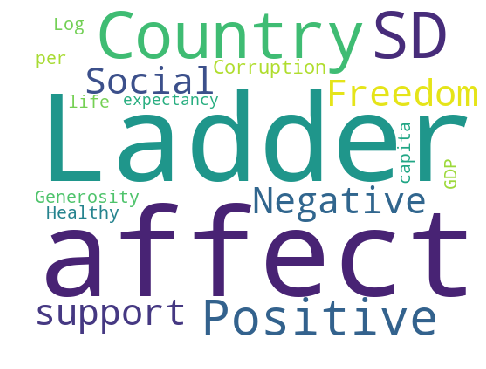

In [21]:
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
    background_color='white',
    width=512,
    height=384
    ).generate(" ".join(df))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()